In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
# load iris data from sklearn datasets
iris = datasets.load_iris()
#print(iris.DESCR)

In [3]:
# В качестве dataset’а взять Iris, оставив 2 класса:
# Iris Versicolor
# Iris Virginica

iris.target_names # for next step we need only indexes 1,2 and skip index 0

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# load dataset to panda
pd_data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
#pd_data
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [5]:
pd_data_filtered = pd_data[pd_data['target'] > 0]
pd_data_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# convert class names by encoder ['versicolor', 'virginica'] (orig as [1.0, 2.0]) to [0, 1]
to_replace = {'target': {1.0: 0, 2.0: 1}}
pd_data_filtered=pd_data_filtered.replace(to_replace)
pd_data_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


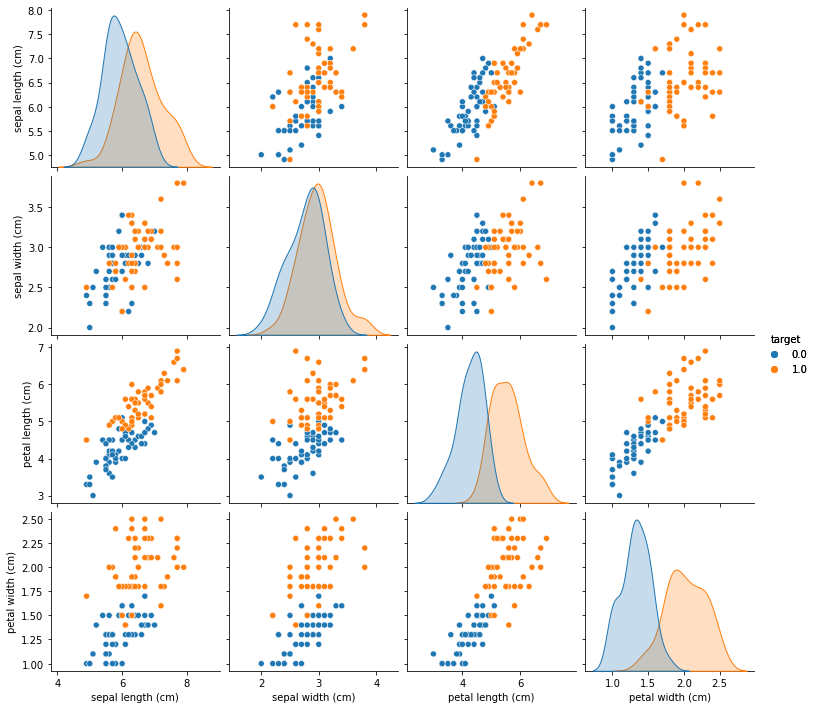

In [7]:
# lets see some linears
sns.pairplot(pd_data_filtered[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','target']], hue='target') \
.add_legend();

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

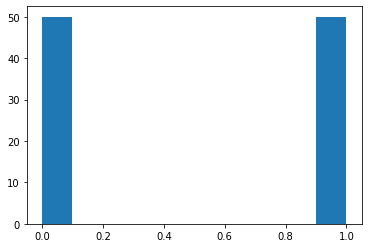

In [8]:
plt.hist(pd_data_filtered[['target']])

In [9]:
len(pd_data_filtered[pd_data_filtered['target'] == 1])

50

In [10]:
pd_data_filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [11]:
# ----------------------------------
# for compare make sklearn model:

X = pd_data_filtered[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] # use data we have
Y = pd_data_filtered['target'] # what we need to find

In [12]:
# split data for train and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train, Y_train

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 98                 5.1               2.5                3.0               1.1
 56                 6.3               3.3                4.7               1.6
 149                5.9               3.0                5.1               1.8
 132                6.4               2.8                5.6               2.2
 126                6.2               2.8                4.8               1.8
 ..                 ...               ...                ...               ...
 146                6.3               2.5                5.0               1.9
 117                7.7               3.8                6.7               2.2
 114                5.8               2.8                5.1               2.4
 97                 6.2               2.9                4.3               1.3
 94                 5.6               2.7                4.2               1.3
 
 [75 rows x 4 columns],
 98     0.0
 56     0.0
 1

In [13]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)

LogisticRegression()

In [14]:
# get the score for fn from sklearn (for compare)
model_logistic.score(X_test, Y_test)

0.92

In [15]:
predictions = model_logistic.predict_proba(X_test)
predictions[:5]

array([[0.67194087, 0.32805913],
       [0.03656475, 0.96343525],
       [0.60764753, 0.39235247],
       [0.00432807, 0.99567193],
       [0.0417672 , 0.9582328 ]])

In [16]:
# ----------------------------------
X_train,Y_train

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 98                 5.1               2.5                3.0               1.1
 56                 6.3               3.3                4.7               1.6
 149                5.9               3.0                5.1               1.8
 132                6.4               2.8                5.6               2.2
 126                6.2               2.8                4.8               1.8
 ..                 ...               ...                ...               ...
 146                6.3               2.5                5.0               1.9
 117                7.7               3.8                6.7               2.2
 114                5.8               2.8                5.1               2.4
 97                 6.2               2.9                4.3               1.3
 94                 5.6               2.7                4.2               1.3
 
 [75 rows x 4 columns],
 98     0.0
 56     0.0
 1

In [17]:
#
# let's create handmade logistic fn
#

In [24]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, nm_iter=100000, method='gradient'):
        self.learning_rate = learning_rate
        self.nm_iter = nm_iter
        self.method = method
        self.theta = None
    
    def sigmoid(self, val):
        return 1 / (1 + np.exp(-val))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        
        if self.method == 'nesterov':
            # using https://ruder.io/optimizing-gradient-descent/index.html#nesterovacceleratedgradient
            gamma = 0.9
            v = 0
            for i in range(self.nm_iter):
                sigmo = self.sigmoid(np.dot(X, self.theta))
                gradient = (np.dot(X.T, (sigmo - y)) / y.shape[0]) - gamma*v
                v = gamma*v + self.learning_rate * gradient
                self.theta = self.theta - v

                loss = self.loss(sigmo, y)

                
        elif self.method == 'rmsprop':
            # using https://ruder.io/optimizing-gradient-descent/index.html#rmsprop
            eps=0.001
            Eg = 0
            gamma = 0.95
            for i in range(self.nm_iter):
                sigmo = self.sigmoid(np.dot(X, self.theta))
                gradient = np.dot(X.T, (sigmo - y)) / y.shape[0]
                Eg = gamma*Eg + (1-gamma) * gradient * gradient
                v = self.learning_rate / np.sqrt(Eg + eps) * gradient
                self.theta = self.theta - v


        else: # method = 'gradient'
            # using https://ruder.io/optimizing-gradient-descent/index.html#gradient
            for i in range(self.nm_iter):
                sigmo = self.sigmoid(np.dot(X, self.theta))
                gradient = np.dot(X.T, (sigmo - y)) / y.shape[0]
                self.theta = self.theta - self.learning_rate * gradient

                loss = self.loss(sigmo, y)
            
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_proba(X).round()
    
    def show_theta(self):
        print(f'theta: {self.theta}')


In [25]:
for method in ['gradient', 'nesterov', 'rmsprop']:    
    model = MyLogisticRegression(nm_iter=5000, method=method)
    model.fit(X_train, Y_train)
    
    model.show_theta()
    predicted = model.predict(X_test)
    print(f'method: {method} = {(predicted == Y_test).mean()}')
    print()

theta: [-1.92868088 -1.70033242  2.70287075  2.34384482]
method: gradient = 0.92

theta: [-4.33011407 -4.62209789  6.27419287  5.97529991]
method: nesterov = 0.92

theta: [-6.1724951  -6.98682707  9.1939887   8.41443569]
method: rmsprop = 0.92

